## **Time Series Analysis**

#### **Market Indexes 2018**
$\star$ **spx:** S&P 500  (USA)

$\star$ **dax:** DAX 30  (GERMANY)

$\star$ **ftse:** FTSE 100 (LONDON UK)

$\star$ **nikkei:** NIKKEI 225 (JAPAN)




In [ ]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import statsmodels.graphics.tsaplots as sgt 
import statsmodels.tsa.stattools as sts 
from statsmodels.tsa.seasonal import seasonal_decompose
import seaborn as sns
sns.set()

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/time_Series/Index2018.csv")
df.head()

,date,spx,dax,ftse,nikkei
0,07/01/1994,469.90,2224.95,3445.98,18124.01
1,10/01/1994,475.27,2225.00,3440.58,18443.44
2,11/01/1994,474.13,2228.10,3413.77,18485.25
3,12/01/1994,474.17,2182.06,3372.02,18793.88
4,13/01/1994,472.47,2142.37,3360.01,18577.26


In [ ]:
df.shape

(6269, 5)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6269 entries, 0 to 6268
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   date    6269 non-null   object 
 1   spx     6269 non-null   float64
 2   dax     6269 non-null   float64
 3   ftse    6269 non-null   float64
 4   nikkei  6269 non-null   float64
dtypes: float64(4), object(1)
memory usage: 245.0+ KB


In [ ]:
df.isna().sum()

date      0
spx       0
dax       0
ftse      0
nikkei    0
dtype: int64

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
spx,6269.0,1288.127542,487.586473,438.92,990.671905,1233.42,1459.987747,2872.867839
dax,6269.0,6080.063363,2754.361032,1911.70,4069.350000,5773.34,7443.070000,13559.600000
ftse,6269.0,5422.713545,1145.572428,2876.60,4486.100000,5662.43,6304.250000,7778.637689
nikkei,6269.0,14597.055700,4043.122953,7054.98,10709.290000,15028.17,17860.470000,24124.150000


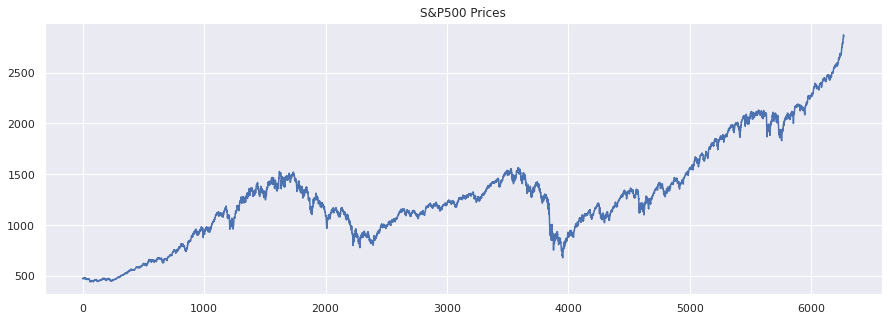

In [ ]:
df.spx.plot(figsize = (15,5), title = "S&P500 Prices");
plt.show()

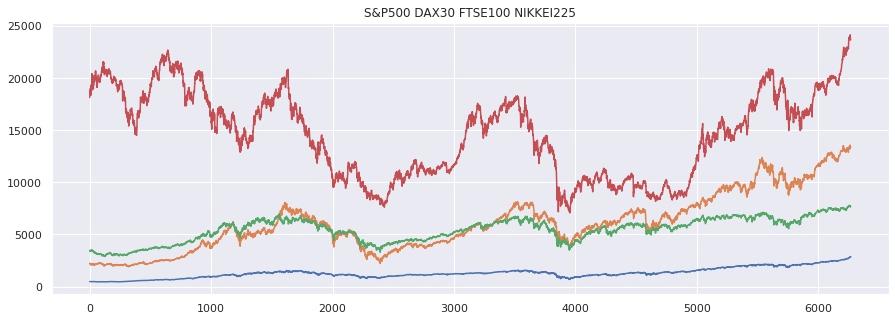

In [ ]:
df.spx.plot(figsize = (15,5));
df.dax.plot(figsize = (15,5));
df.ftse.plot(figsize = (15,5));
df.nikkei.plot(figsize = (15,5));
plt.title("S&P500 DAX30 FTSE100 NIKKEI225")
plt.show()


#### **The QQ Plot**

In [ ]:
import scipy.stats
import pylab

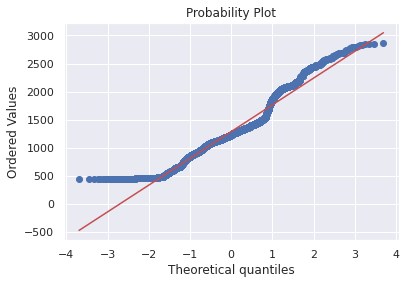

In [ ]:
scipy.stats.probplot(df.spx, plot = pylab)
pylab.show()

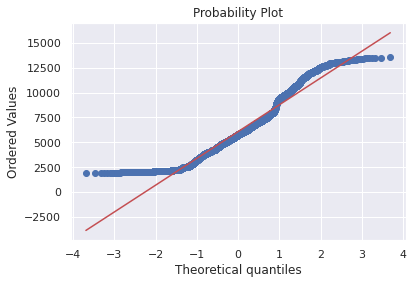

In [ ]:
scipy.stats.probplot(df.dax, plot = pylab)
pylab.show()

Takes all the value a variable can take, and arranges them in accending order.

Theoretical quantiles: How many standart deviations away from the mean these values are.

#### **Length of the Time Period**

In [ ]:
df.date = pd.to_datetime(df.date, dayfirst = True)

In [ ]:
df.date.describe()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  """Entry point for launching an IPython kernel.


count                    6269
unique                   6269
top       1994-01-07 00:00:00
freq                        1
first     1994-01-07 00:00:00
last      2018-01-29 00:00:00
Name: date, dtype: object

In [ ]:
df.set_index("date", inplace = True)
df.head()

,spx,dax,ftse,nikkei
date,,,,
1994-01-07,469.90,2224.95,3445.98,18124.01
1994-01-10,475.27,2225.00,3440.58,18443.44
1994-01-11,474.13,2228.10,3413.77,18485.25
1994-01-12,474.17,2182.06,3372.02,18793.88
1994-01-13,472.47,2142.37,3360.01,18577.26


* df.date.describe() 

* Expect to get an error message because we no longer have a "date" column since it is the index.

#### **Setting the Desired Frequency**

'h' : hour

'd' : daily

'w' : weekly

'm' : monthly

'b' : business day



In [ ]:
df = df.asfreq('d')
df.head()

,spx,dax,ftse,nikkei
date,,,,
1994-01-07,469.90,2224.95,3445.98,18124.01
1994-01-08,NaN,NaN,NaN,NaN
1994-01-09,NaN,NaN,NaN,NaN
1994-01-10,475.27,2225.00,3440.58,18443.44
1994-01-11,474.13,2228.10,3413.77,18485.25


In [ ]:
df = df.asfreq('b')
df.head()

,spx,dax,ftse,nikkei
date,,,,
1994-01-07,469.90,2224.95,3445.98,18124.01
1994-01-10,475.27,2225.00,3440.58,18443.44
1994-01-11,474.13,2228.10,3413.77,18485.25
1994-01-12,474.17,2182.06,3372.02,18793.88
1994-01-13,472.47,2142.37,3360.01,18577.26


In [ ]:
df.isna().sum()

spx       8
dax       8
ftse      8
nikkei    8
dtype: int64

In [ ]:
df.spx = df.spx.fillna(method = "ffill")
df.ftse = df.ftse.fillna(method = "bfill")

#Front filling copies the previous known value, whereas backfilling uses the next known value.

In [ ]:
df.isna().sum()

spx       0
dax       8
ftse      0
nikkei    8
dtype: int64

In [ ]:
df.dax = df.dax.fillna(value = df.dax.mean())
df.isna().sum()

spx       0
dax       0
ftse      0
nikkei    8
dtype: int64

In [ ]:
df["market_value"] = df.spx
df.head()

,spx,dax,ftse,nikkei,market_value
date,,,,,
1994-01-07,469.90,2224.95,3445.98,18124.01,469.90
1994-01-10,475.27,2225.00,3440.58,18443.44,475.27
1994-01-11,474.13,2228.10,3413.77,18485.25,474.13
1994-01-12,474.17,2182.06,3372.02,18793.88,474.17
1994-01-13,472.47,2142.37,3360.01,18577.26,472.47


In [ ]:
del df["spx"], df["dax"], df["nikkei"], df["ftse"]
df.head()

,market_value
date,
1994-01-07,469.90
1994-01-10,475.27
1994-01-11,474.13
1994-01-12,474.17
1994-01-13,472.47


In [ ]:
size = int(len(df)*0.8)
df, df_test = df.iloc[:size], df.iloc[size:]

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
market_value,5021.0,1091.651926,292.559287,438.92,914.62,1144.65,1316.280729,1570.252238


In [ ]:
df_test.describe().T

,count,mean,std,min,25%,50%,75%,max
market_value,1256.0,2076.134514,268.352345,1541.613396,1892.094915,2064.879102,2186.932571,2872.867839


In [ ]:
wn = np.random.normal(loc = df.market_value.mean(),
                      scale = df.market_value.std(),
                      size = len(df))
wn

array([1142.78830275, 1364.44580599,  876.20818419, ...,  997.03141767,
        846.02560645, 1296.64271894])

In [ ]:
df['wn'] = wn
df.describe().T

,count,mean,std,min,25%,50%,75%,max
market_value,5021.0,1091.651926,292.559287,438.920000,914.620000,1144.650000,1316.280729,1570.252238
wn,5021.0,1089.224363,290.456863,40.525084,897.741385,1086.095336,1280.377136,2165.390627


* Normally distributed around the mean of the S&P.

* Since each one is generated individually, the average does not have to end up being the same.

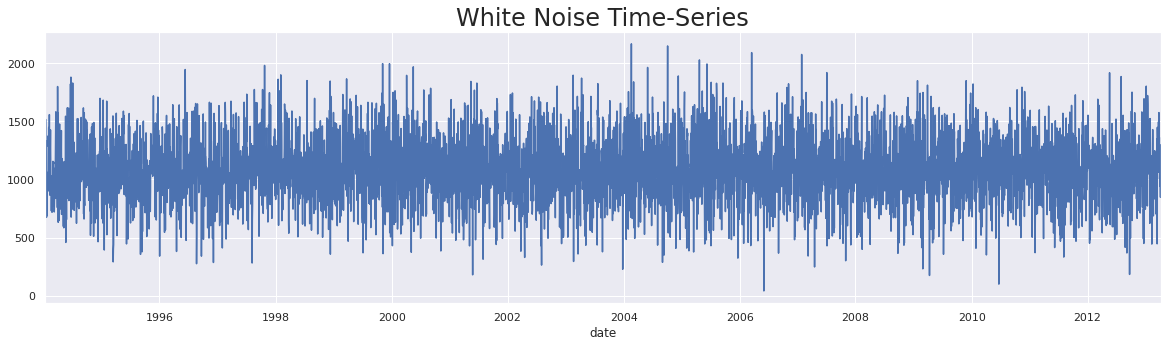

In [ ]:
df.wn.plot(figsize = (20,5))
plt.title("White Noise Time-Series", size= 24)
plt.show()

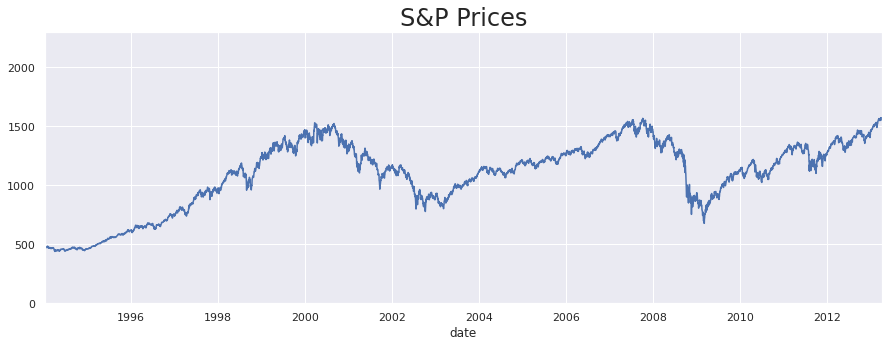

In [ ]:
df.market_value.plot(figsize=(15,5))
plt.title("S&P Prices", size = 24)
plt.ylim(0,2300)
plt.show()

In [ ]:
rw = pd.read_csv("/content/drive/MyDrive/time_Series/RandWalk.csv")
rw.date = pd.to_datetime(rw.date, dayfirst = True)
rw.set_index("date", inplace = True)
rw = rw.asfreq('b')

In [ ]:
rw.head()

,price
date,
1994-01-07,1122.139662
1994-01-10,1080.347860
1994-01-11,1082.095245
1994-01-12,1083.639265
1994-01-13,1067.146255


In [ ]:
rw.describe().T

,count,mean,std,min,25%,50%,75%,max
price,5021.0,1269.944293,444.216793,585.483034,931.550429,1156.363045,1488.362029,2715.50872


In [ ]:
df["rw"] = rw.price
df.head()

,market_value,wn,rw
date,,,
1994-01-07,469.90,1142.788303,1122.139662
1994-01-10,475.27,1364.445806,1080.347860
1994-01-11,474.13,876.208184,1082.095245
1994-01-12,474.17,973.851863,1083.639265
1994-01-13,472.47,1516.804418,1067.146255


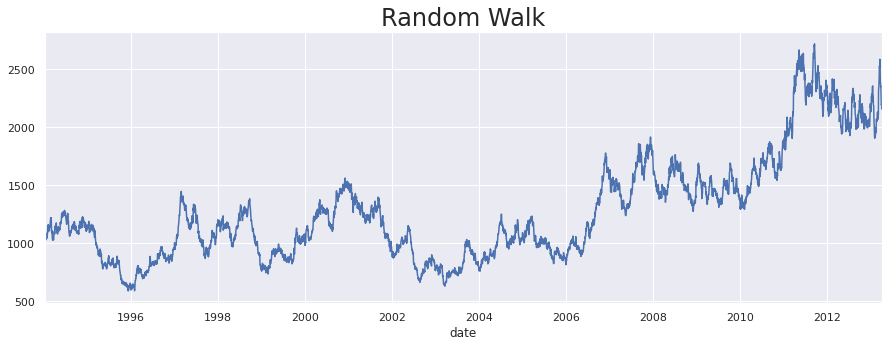

In [ ]:
df.rw.plot(figsize = (15, 5))
plt.title("Random Walk", size = 24)
plt.show()

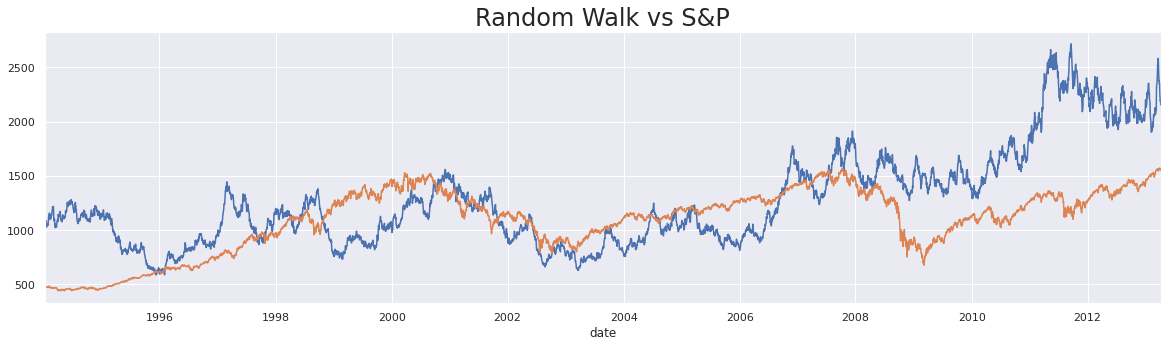

In [ ]:
df.rw.plot(figsize = (20,5))
df.market_value.plot()
plt.title("Random Walk vs S&P", size = 24)
plt.show()

* Small variations between consecutive time periods.

* Cyclical increases and decreases in short periods of time.

#### **Stationarity**


In [ ]:
sts.adfuller(df.market_value)

(-1.736984745235244,
 0.41216456967706194,
 18,
 5002,
 {'1%': -3.431658008603046,
  '5%': -2.862117998412982,
  '10%': -2.567077669247375},
 39904.880607487445)

In [ ]:
sts.adfuller(df.wn)

(-48.75459862158573,
 0.0,
 1,
 5019,
 {'1%': -3.4316535759402753,
  '5%': -2.8621160400844468,
  '10%': -2.567076626752987},
 70747.30728736521)

In [ ]:
sts.adfuller(df.rw)

(-1.3286073927689706,
 0.615984918161739,
 24,
 4996,
 {'1%': -3.4316595802782865,
  '5%': -2.8621186927706463,
  '10%': -2.567078038881065},
 46299.333497595144)

#### **Seasonality**

**Decomposition**

Split into 3 effects:

* Trend -> Pattern

* Seaonal -> Cyclical effect

* Residual -> Error of prediction

**"Naive" Decomposition**

* Additive : observed = trend + seasonal + residual

* Multiplicative : observed = trend * seasonal * residual


** Correlation : Measures the similarity in the change of values of two series.

** Autocorrelation : There is correlation between the values of the time series and a lagged version of itself.

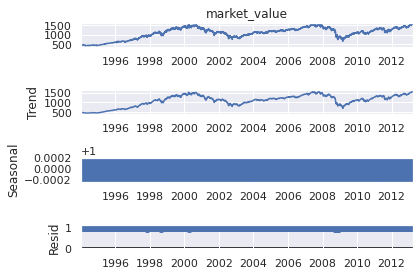

In [ ]:
s_dec_multiplicative = seasonal_decompose(df.market_value, model = "multiplicative")
s_dec_multiplicative.plot()
plt.show()

#### **ACF**

The relationship between past values and the current one.

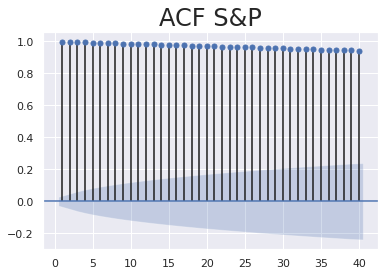

In [ ]:
sgt.plot_acf(df.market_value, lags = 40, zero = False)
plt.title("ACF S&P", size = 24)
plt.show()

# x -> lags values, y -> correlation values

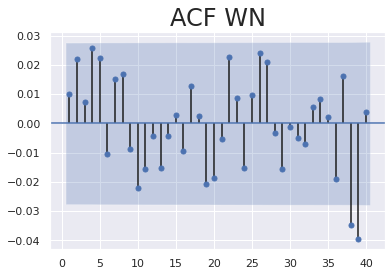

In [ ]:
sgt.plot_acf(df.wn, lags = 40, zero = False)
plt.title("ACF WN", size = 24)
plt.show()

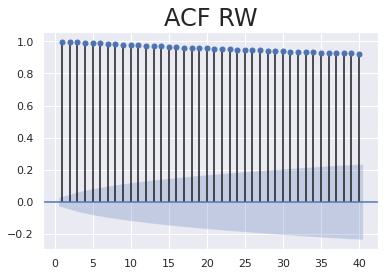

In [ ]:
sgt.plot_acf(df.rw, lags = 40, zero = False)
plt.title("ACF RW", size = 24)
plt.show()

#### **PACF**

The ACF measures the accumulated effects past lags have on the current value, while the PACF measures the direct effects.

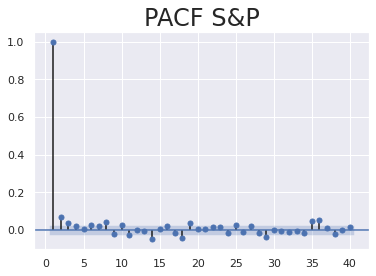

In [ ]:
sgt.plot_pacf(df.market_value, lags = 40, zero = False, method = ('ols'))
plt.title("PACF S&P", size = 24)
plt.show()

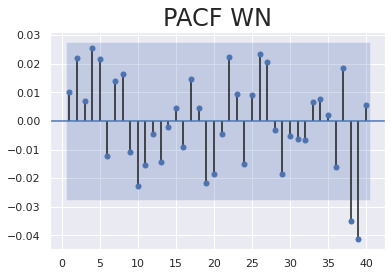

In [ ]:
sgt.plot_pacf(df.wn, lags = 40, zero = False, method = ('ols'))
plt.title("PACF WN", size = 24)
plt.show()

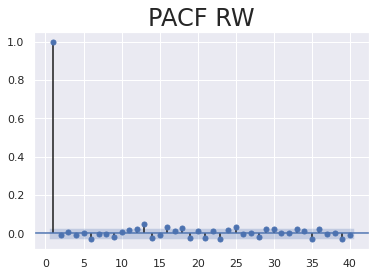

In [ ]:
sgt.plot_pacf(df.rw, lags = 40, zero = False, method = ('ols'))
plt.title("PACF RW", size = 24)
plt.show()